<a href="https://colab.research.google.com/github/Askoye/IP-Core/blob/master/Python_Notebook_Solution_Moringa_Data_Science_Core_W2_Ted_Askoye_Independent_Project_2020_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis: Univariate Analysis
1. Defining the Question

a) Specifying the Data Analytic Question

Finding out the state of Financial inclusion in Kenya, Rwanda, Tanzania and Uganda between 2016-2018



b) Defining the Metric for Success

1.   Which individuals have access to banking services
2.   Finding out the number of banks within each region
3.   Finding out the sex, age, level of education 





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Dataset files :

Variable Definitions: http://bit.ly/VariableDefinitions 

Dataset: http://bit.ly/FinancialDataset  

In [ ]:
dataset_df = pd.read_csv('http://bit.ly/FinancialDataset')
var_def_df = pd.read_csv('http://bit.ly/VariableDefinitions')


Determining the number of records

In [ ]:
dataset_df.shape
print('This dataset has ' + str(dataset_df.shape[0]) + ' rows, and ' + str(dataset_df.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [ ]:
var_def_df.shape
print('This dataset has ' + str(var_def_df.shape[0]) + ' rows, and ' + str(var_def_df.shape[1]) + ' columns')

This dataset has 12 rows, and 2 columns


Previewing our data

In [ ]:
print(dataset_df)
print('xxx'*30)
print(var_def_df.head())
print('xxx'*30)
print(dataset_df.info())
print('xxx'*30)


      country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

Detect Outliers using Z-score and removing them

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataset_df['year']))

In [ ]:
outliers=[]

def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(dataset_df['year'])


[2029, 2056, 2039]

Dropping Outliers and Checking on whether the changes are effected

In [ ]:
dataset_df_out = dataset_df.drop(outliers)

In [ ]:
dataset_df_out.shape
print('The new dataset has ' + str(dataset_df_out.shape[0]) + ' rows, and ' + str(dataset_df_out.shape[1]) + ' columns')
print('xxx'*30)
dataset_df.shape
print('The old dataset has ' + str(dataset_df.shape[0]) + ' rows, and ' + str(dataset_df.shape[1]) + ' columns')

The new dataset has 23521 rows, and 13 columns
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The old dataset has 23524 rows, and 13 columns


In [ ]:
# Converting Year to String
#dataset_df_out['year'] = dataset_df_out['year'].astype(str)


Renamaing the columns


In [ ]:
dataset_df_out.columns = map(str.lower, dataset_df.columns)
columns = ['country', 'year', 'unique_id', 'bank_acc_access', 'location_type','cell_access', 
           'household_size', 'age', 'gender', 'family_role','marital_status','education_level','job_status']
dataset_df_out.columns = columns
dataset_df_out.columns

Index(['country', 'year', 'unique_id', 'bank_acc_access', 'location_type',
       'cell_access', 'household_size', 'age', 'gender', 'family_role',
       'marital_status', 'education_level', 'job_status'],
      dtype='object')

In [ ]:
# Preview our data after conversion

print(dataset_df_out.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23521 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          23507 non-null  object 
 1   year             23521 non-null  int64  
 2   unique_id        23521 non-null  object 
 3   bank_acc_access  23485 non-null  object 
 4   location_type    23506 non-null  object 
 5   cell_access      23510 non-null  object 
 6   household_size   23493 non-null  float64
 7   age              23487 non-null  float64
 8   gender           23487 non-null  object 
 9   family_role      23517 non-null  object 
 10  marital_status   23489 non-null  object 
 11  education_level  23492 non-null  object 
 12  job_status       23491 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB
None


In [ ]:
print(dataset_df_out.describe())

               year  household_size           age
count  23521.000000    23493.000000  23487.000000
mean    2016.978870        3.681905     38.804743
std        0.899653        2.280010     16.518939
min     2016.000000        0.000000     16.000000
25%     2016.000000        2.000000     26.000000
50%     2017.000000        3.000000     35.000000
75%     2018.000000        5.000000     49.000000
max     2056.000000       21.000000    100.000000


Validation


In [ ]:
year2016 = dataset_df_out['year'] == 2016
print(dataset_df_out[year2016])

      country  year  ...  Level of Educuation           Type of Job
6068   Rwanda  2016  ...  Secondary education  Remittance Dependent
6069   Rwanda  2016  ...  Secondary education         Self employed
6070   Rwanda  2016  ...  No formal education   Farming and Fishing
6071   Rwanda  2016  ...   Tertiary education   Informally employed
6072   Rwanda  2016  ...    Primary education   Informally employed
...       ...   ...  ...                  ...                   ...
14798  Rwanda  2016  ...    Primary education   Farming and Fishing
14799  Rwanda  2016  ...  No formal education  Remittance Dependent
14800  Rwanda  2016  ...    Primary education   Farming and Fishing
14801  Rwanda  2016  ...    Primary education   Informally employed
14802  Rwanda  2016  ...  No formal education   Farming and Fishing

[8641 rows x 13 columns]


Tidying up

1. Checking for Outliers

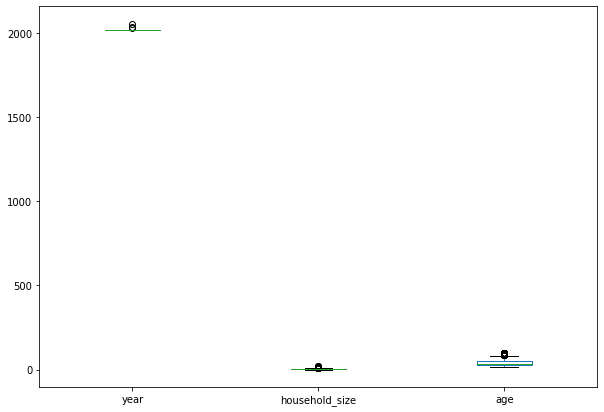

In [ ]:
dataset_df_out.boxplot(grid = False, figsize=(10, 7))

Checking for Anomalies


In [ ]:
dataset_df_out

,country,year,unique_id,bank_acc_access,location_type,cell_access,household_size,age,gender,family_role,marital_status,education_level,job_status
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Identifying missing data

In [ ]:
dataset_df_out.isnull().sum()

country            14
year                0
unique_id           0
bank_acc_access    36
location_type      15
cell_access        11
household_size     28
age                34
gender             34
family_role         4
marital_status     32
education_level    29
job_status         30
dtype: int64

We will not deal with the missing values of data as they represent information that is vital

More data cleaning procedures

In [ ]:

Q1 = dataset_df_out.quantile(0.25)
Q3 = dataset_df_out.quantile(0.75)
IQR = Q3 - Q1
dataset_df_out = dataset_df[~((dataset_df < (Q1 - 1.5 * IQR)) | (dataset_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset_df)
print('xxx'*30)
print(dataset_df_out)

      country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

Ploting the univariate summaries and recording our observations

In [ ]:
print("Year 2016 - Year 2017")
print(dataset_df_out.describe())
print("Year 2017 - Year 2018")
print(dataset_df_out.describe())

Year 2016 - Year 2017
               year  household_size  Respondent Age
count  23144.000000    23116.000000    23111.000000
mean    2016.967594        3.560348       38.869889
std        0.844566        2.079148       16.537229
min     2016.000000        0.000000       16.000000
25%     2016.000000        2.000000       26.000000
50%     2017.000000        3.000000       35.000000
75%     2018.000000        5.000000       49.000000
max     2018.000000        9.000000      100.000000
Year 2017 - Year 2018
               year  household_size  Respondent Age
count  23144.000000    23116.000000    23111.000000
mean    2016.967594        3.560348       38.869889
std        0.844566        2.079148       16.537229
min     2016.000000        0.000000       16.000000
25%     2016.000000        2.000000       26.000000
50%     2017.000000        3.000000       35.000000
75%     2018.000000        5.000000       49.000000
max     2018.000000        9.000000      100.000000


Ploting the bivariate summaries and recording our observations

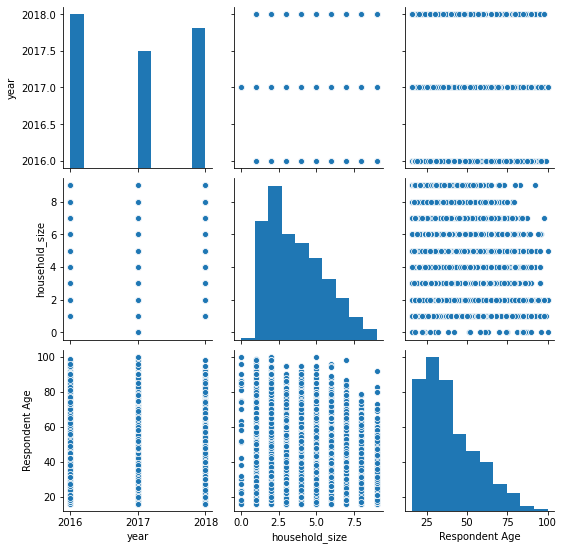

In [ ]:
sns.pairplot(dataset_df_out)
plt.show()

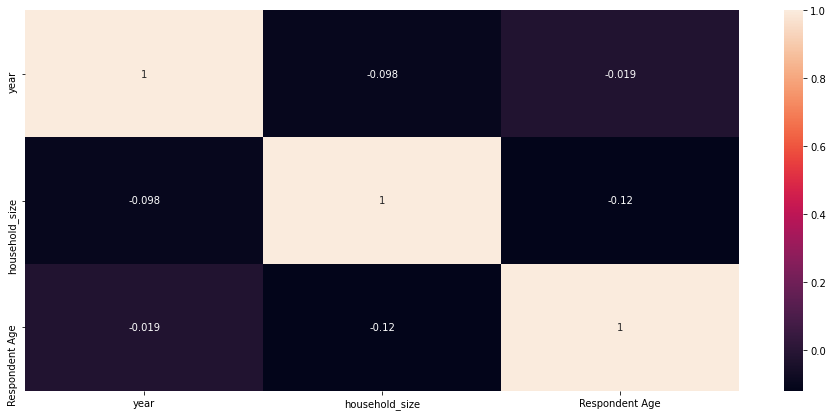

In [ ]:
plt.figure(figsize = (16,7))
sns.heatmap(dataset_df_out.corr(),annot=True)
plt.show()


In [ ]:
dataset_df["year"].corr(dataset_df["household_size"]) 

-0.04934365032853075